## Supervised ML(Task 1)

### Problem Statement:
Predict the percentage  of marks obtained by a student based on the no. of study hours.

##### BY ANEENA ANN SUNIL

## Downloading and Exploring the data

In [1]:
student_scores_url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(student_scores_url,'student_scores.csv')

('student_scores.csv', <http.client.HTTPMessage at 0x20054824630>)

In [4]:
#importing Libraries required 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Reading the data
student_scores_df=pd.read_csv('student_scores.csv')
print("Data imported successfully")

Data imported successfully


In [6]:
student_scores_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
student_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
student_scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
student_scores_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Exploratory Data Analysis and Visualization

In [10]:
sns.set_style('whitegrid')

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


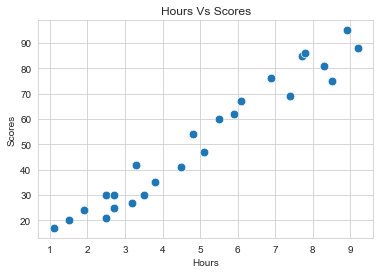

In [11]:
#plotting the distribution of Scores
plt.title('Hours Vs Scores')
sns.scatterplot('Hours',
                'Scores',
                 s=75 ,
                data=student_scores_df);

From the graph we can clearly see that there is a positive linear relation between the number of hours studied and precentage of score

## Preparing the Data for Training

In [12]:
from sklearn.model_selection import train_test_split

Identifying Inputs and Targets

In [13]:
input_df= student_scores_df.iloc[:, :-1].values  
target= student_scores_df.iloc[:, 1].values 

Splitting the data into training and test sets using Scikit-Learn's built in train_test_split() method.

In [14]:
input_train, input_test, target_train, target_test = train_test_split(input_df, target, 
                            test_size=0.2, random_state=0)

In [15]:
print('input_train:',input_train.shape)
print('input_test.shape:',input_test.shape)
print('input_train.shape:',input_train.shape)
print('input_test.shape:',input_test.shape)

input_train: (20, 1)
input_test.shape: (5, 1)
input_train.shape: (20, 1)
input_test.shape: (5, 1)


## Training the Model using Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model=LinearRegression()

In [18]:

print('input_train.shape:',input_train.shape)
print('target_train.shape:',target_train.shape)

input_train.shape: (20, 1)
target_train.shape: (20,)


In [19]:
model.fit(input_train,target_train)

LinearRegression()

## Making Predictions Using the Model

In [20]:
train_preds=model.predict(input_train)
train_preds

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

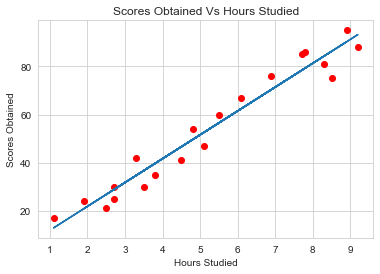

In [21]:
#plotting the regression line for train data
plt.scatter(input_train,target_train,color='red')
plt.plot(input_train, train_preds)
plt.title('Scores Obtained Vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained');


In [22]:
test_pred=model.predict(input_test)
test_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

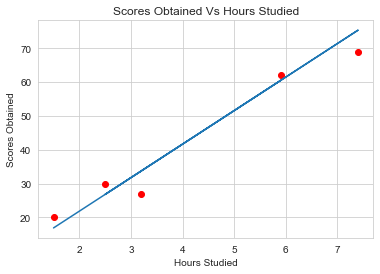

In [23]:
#plotting the regression line for test data
plt.scatter(input_test,target_test,color='red')
plt.plot(input_test, test_pred)
plt.title('Scores Obtained Vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained');


In [24]:
Hours=[5]
model.predict([Hours])

array([51.57144244])

Comparing Actual Vs Predicted

In [25]:
df=pd.DataFrame({'Actual':target_test,'Predicted':test_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


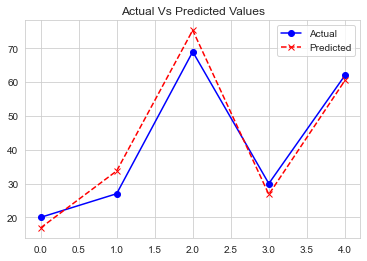

In [26]:
plt.plot(target_test, 'o-b')
plt.plot(test_pred, 'x--r')



plt.title('Actual Vs Predicted Values')
plt.legend(['Actual','Predicted']);

# Evaluating the Model

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
train_rmse=mean_squared_error(target_train, train_preds,squared=False)

In [29]:
print('The RMSE loss for the training set is {}'.format(train_rmse))

The RMSE loss for the training set is 5.558613350226342


In [30]:
test_rmse=mean_squared_error(target_test, test_pred,squared=False)

In [31]:
print('The RMSE loss for the training set is {}'.format(test_rmse))

The RMSE loss for the training set is 4.647447612100367


## Result

In [32]:
sample_input=[9.25]
predicted_score=model.predict([sample_input])
print(f"The predicted score for a student for{sample_input} no. of study hours is {predicted_score[0]}")

The predicted score for a student for[9.25] no. of study hours is 93.69173248737535


### Thankyou